## CAP5610 HW3 - Yuan Du
Code stored at my Github: https://github.com/YuanEldaif/CAP5610


In [1]:
#Data analysis and wrangling
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Model selection and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics

# Load in the train and test datasets
train = pd.read_csv('C:/Work/Project/CAP5610/HW/HW3/train.csv')
test = pd.read_csv('C:/Work/Project/CAP5610/HW/HW3/test.csv')


In [ ]:
train.info()

In [ ]:
test.info()

In [2]:
#Encoding Features
# Import LabelEncoder
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train["Opponent_code"] = le.fit_transform(train["Opponent"])
test["Opponent_code"] = le.fit_transform(test["Opponent"])
train["Home_or_Away_code"] = le.fit_transform(train["Is_Home_or_Away"])
test["Home_or_Away_code"] = le.fit_transform(test["Is_Home_or_Away"])
train["AP25_code"] = le.fit_transform(train["Is_Opponent_in_AP25_Preseason"])
test["AP25_code"] = le.fit_transform(test["Is_Opponent_in_AP25_Preseason"])
train["Media_code"] = le.fit_transform(train["Media"])
test["Media_code"] = le.fit_transform(test["Media"])
train["Label_code"] = le.fit_transform(train["Label"])
test["Label_code"] = le.fit_transform(test["Label"])

#train.head(10)

In [3]:
#Data for models
X_train = train.drop(["Label_code","Label","ID","Date","Opponent","Is_Home_or_Away","Is_Opponent_in_AP25_Preseason","Media"], axis=1)
y_train = train["Label_code"]
X_test  = test.drop(["Label_code","Label","ID","Date","Opponent","Is_Home_or_Away","Is_Opponent_in_AP25_Preseason","Media"], axis=1)
y_test = test["Label_code"]

combine = [train, test]

In [ ]:
X_train.head()

In [4]:
#fit models NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

## Task 1 Programming and Evaluation on A Small Dataset 
### Q1: Programming
Naive Bayes Accuracy, Precision, Recall, and F1 score on the testing result:

In [5]:
#print("Number of mislabeled points out of a total %d points : %d"
#% (X_test.shape[0], (y_test != y_pred).sum()))
print('NB test Accuracy:',metrics.accuracy_score(y_test,y_pred))
print("NB test Precision:",metrics.precision_score(y_test, y_pred))
print("NB test Recall:",metrics.recall_score(y_test, y_pred))
print('NB test F1-Score:',metrics.f1_score(y_test,y_pred))

NB test Accuracy: 0.8333333333333334
NB test Precision: 1.0
NB test Recall: 0.7777777777777778
NB test F1-Score: 0.8750000000000001


Best KNN Accuracy, Precision, Recall, and F1 score on the testing result (k=7):

In [ ]:
#fit model KNN
k = 4 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("KNN test Accuracy at K=4 is",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#optimal k value Error rate vs K
error_rate = []
for i in range(1,12):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
#Accuracy vs K
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,12),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [6]:
#fit model KNN
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [7]:
print('KNN test Accuracy:',metrics.accuracy_score(y_test,y_pred))
print("KNN test Precision:",metrics.precision_score(y_test, y_pred))
print("KNN test Recall:",metrics.recall_score(y_test, y_pred))
print('KNN test F1-Score:',metrics.f1_score(y_test,y_pred))

KNN test Accuracy: 0.75
KNN test Precision: 0.8
KNN test Recall: 0.8888888888888888
KNN test F1-Score: 0.8421052631578948


### Q2: Write down the prediction labels of the 12 testing games in the PDF.
Prediction labels of 12 testng games (win=1, lose=0):

In [8]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## Task 2 Programming and Evaluation on A Large Dataset (Titanic): 
### Q1: Test your naïve Bayesian classification on the Titanic dataset. Report the average Accuracy, Precision, Recall, and F1 score of your five-fold cross validation. The five-folds of the Titanic data are split randomly. What do you observe and learn by applying Bayesian learning to small datasets and larger datasets? 

In [9]:
#Data analysis and wrangling
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load in the train and test datasets
train = pd.read_csv('C:/Work/Project/CAP5610/HW/HW1/train.csv')
test = pd.read_csv('C:/Work/Project/CAP5610/HW/HW1/test.csv')

combine = [train, test]

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

#Q14 drop ticket
#Q15 drop cabin
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

#Q16 Convert sex to numeric

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#Q17 
# fill missing values with median column values
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

#Q18 Fill embarked with mode
freq_port = train.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
#Q19 complete Fare using mode
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)    

# update combine
combine = [train, test]

#Q20 Convert the Fare feature to ordinal values
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
#Convert categorical variables into numeric
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#Drop Name,PassengerId
train = train.drop(['Name','PassengerId'], axis=1)
test = test.drop(['Name','PassengerId'], axis=1)


In [ ]:
train.head()

In [10]:
#after variable selection F1
from sklearn.model_selection import train_test_split
X=train.drop(columns=['Survived','SibSp','Parch','Embarked']).values
Y=train['Survived'].values
XX_train, XX_test, YY_train, YY_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
XX_train.shape, YY_train.shape, XX_test.shape, YY_test.shape

((712, 4), (712,), (179, 4), (179,))

In [11]:
#fit models NB
gnb = GaussianNB()
gnb.fit(XX_train, YY_train)
Y_pred = gnb.predict(XX_test)

In [12]:
print('NB test Accuracy:',metrics.accuracy_score(YY_test,Y_pred))
print("NB test Precision:",metrics.precision_score(YY_test, Y_pred))
print("NB test Recall:",metrics.recall_score(YY_test, Y_pred))
print('NB test F1-Score:',metrics.f1_score(YY_test,Y_pred))

NB test Accuracy: 0.7486033519553073
NB test Precision: 0.6666666666666666
NB test Recall: 0.7837837837837838
NB test F1-Score: 0.7204968944099379


In [14]:
from sklearn.model_selection import cross_validate
gnb = GaussianNB()
nb = gnb.fit(XX_train, YY_train)
scoring=['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(nb, XX_train, YY_train, cv=5, scoring=scoring)
#scores


In [ ]:
print("5K CV Naive Bayes average classification scores: ", np.mean(i[i<0]) for i in slist)

In [15]:
slist=list(scores.values())
#slist

In [16]:
# Output list initialization 
Output = [] 
for i in range(len(slist)): 
   Output.append(np.average(slist[i])) 

print("5K CV Naive Bayes average classification scores: fit_time, score_time, accuracy, precision, recall, F1-score",Output) 

5K CV Naive Bayes average classification scores: fit_time, score_time, accuracy, precision, recall, F1-score [0.0013956546783447266, 0.0037900447845458985, 0.748517679503595, 0.6444199207696661, 0.7384346610761705, 0.6879039905884378]


Naive Bayes performs better on small dataset than large dataset based the performance on the small football data vs the larger dataset on the Titanic dataset.

### Q2: Implement KNN classification from scratch, and evaluate how K impacts the overall accuracy of kNN on the dataset. Plot the accuracies of kNN over k,  and identify the best K. 

The best K is at K =  1 with Maximum accuracy:- 0.7932960893854749


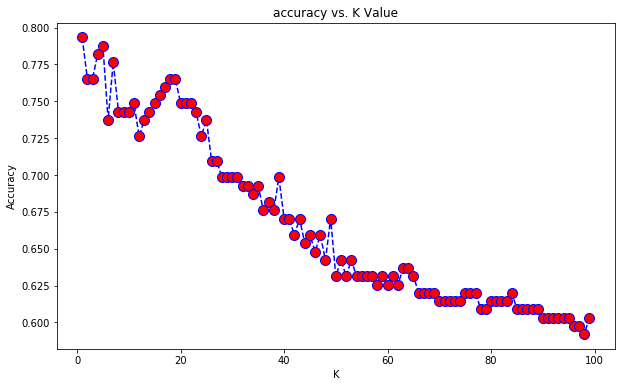

In [17]:
#Accuracy vs K
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(XX_train,YY_train)
    yhat = neigh.predict(XX_test)
    acc.append(metrics.accuracy_score(YY_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("The best K is at K = " ,acc.index(max(acc))+1, "with Maximum accuracy:-",max(acc))